In [1]:
import pandas as pd
from copy import deepcopy
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

# plt.switch_backend('Qt5Agg')
# %matplotlib

# plt.rcParams['figure.figsize'] = [20, 10]
# font = {'weight' : 'normal',
#         'size'   : 24}
# dpi = 300
# matplotlib.rc('font', **font)

def ci(data):
    sdata = sorted(data.dropna())
    n = len(sdata)
    # z = 1.96 # 95%
    z = 2.576 # 99%
    # z = 3.291 # 99.9%
    lower_pos = math.floor((n - z*math.sqrt(n))/2)
    upper_pos = math.ceil(1 + (n + z*math.sqrt(n))/2)
    return sdata[lower_pos-1], sdata[upper_pos-1]

def calculate_ci(df):
    cols_to_use = [i for i in range(1, 20)]
    df['min_time']    = df.loc[:, cols_to_use].min(axis=1, skipna=True)
    df['max_time']    = df.loc[:, cols_to_use].max(axis=1, skipna=True)
    df['median_time'] = df.loc[:, cols_to_use].median(axis=1, skipna=True)
    df['mean_time']   = df.loc[:, cols_to_use].mean(axis=1, skipna=True)
    df['std_time']    = df.loc[:, cols_to_use].std(axis=1, skipna=True)
    
    df['ci']               = df.loc[:, cols_to_use].apply(lambda x: ci(x), axis=1)
    df[['cimin', 'cimax']] = pd.DataFrame(df['ci'].tolist(), index=df.index)
    df['cimin_p']          = df['cimin']    / df['median_time']
    df['cimax_p']          = df['cimax']    / df['median_time']
    
    return df


In [2]:
threads = 24
df_m = pd.read_csv('../results/matlab_{}.txt'.format(threads), delimiter='\t')
df_j = pd.read_csv('../results/julia_{}.txt'.format(threads), delimiter=';')
df_c = pd.read_csv('../results/c_{}.txt'.format(threads), delimiter=';')
df_cppa = pd.read_csv('../results/armadillo_{}.txt'.format(threads), delimiter=';')
df_cppe = pd.read_csv('../results/eigen_{}.txt'.format(threads), delimiter=';')
df_py = pd.read_csv('../results/python_{}.txt'.format(threads), delimiter=';')
df_r = pd.read_csv('../results/R_{}.txt'.format(threads), delimiter=';')
df_o = pd.read_csv('../results/octave_{}.txt'.format(threads), delimiter=';')
# df_temp['algorithm'] = df_temp['algorithm'].apply(lambda x: x.split('_')[0]+'_implicit')
# df_c = df_c.append(df_temp, ignore_index=True)

df_merged = pd.merge(df_m[['algorithm', 'Min']], df_j[['algorithm','Julia']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Matlab'}, inplace=True)

df_merged = pd.merge(df_merged, df_c[['algorithm','C']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppa[['algorithm','Armadillo']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppe[['algorithm','Eigen']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_py[['algorithm','Python']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_r[['algorithm','R']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_o[['algorithm','Min']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Octave'}, inplace=True)
df_merged.rename(columns={'Armadillo': 'Arma'}, inplace=True)

df_merged = df_merged.reindex(columns=['algorithm', 'C', 'Arma', 'Eigen', 'Julia', 'Matlab', 'Python', 'Octave', 'R'])
df_merged = df_merged.set_index(['algorithm'])
# df_merged
# df_merged.sort_values('algorithm').reset_index(drop=True)

In [3]:
df_j_t = pd.read_csv('../results/julia_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_m_t = pd.read_csv('../results/matlab_{}_timings.txt'.format(threads), delimiter='\t', header=None, skiprows=1)
df_cppa_t = pd.read_csv('../results/armadillo_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_cppe_t = pd.read_csv('../results/eigen_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_py_t = pd.read_csv('../results/python_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_r_t = pd.read_csv('../results/R_{}_timings.txt'.format(threads), delimiter=';', header=None)
# print(df_merged.reset_index(drop=True).replace(np.NaN, '-'))

In [9]:
keywords = ['solve_nai', 'solve_rec', 'solve_sym', 'solve_spd', 'solve_tri', 'solve_dia']
df_merged.loc[keywords].reindex(keywords).round(3)
# print(df_merged.loc[keywords].reindex(keywords).round(3).to_latex())

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
solve_nai,0.949,0.441,1.839,1.053,1.304,1.287,1.528,1.588
solve_rec,0.349,0.447,0.556,0.495,0.784,0.457,0.826,0.663
solve_sym,0.799,0.433,0.573,0.456,0.866,0.443,0.819,0.675
solve_spd,0.181,0.429,0.508,0.454,0.579,0.429,0.591,0.638
solve_tri,0.036,0.156,0.543,0.061,0.064,0.441,0.098,0.599
solve_dia,0.020,0.136,0.539,0.070,0.067,0.426,0.148,0.618


In [26]:
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit_compact', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
gemm_explicit,0.53,-,-,0.576,-,0.968,-,-
gemm_implicit_noup,0.551,0.571,0.693,0.541,0.574,0.643,0.556,0.656
gemm_implicit_compact,-,0.58,0.709,0.654,-,0.677,0.669,-
gemm_implicit,0.53,0.598,0.703,0.655,0.554,0.657,0.67,0.772
gemm_implicit_coeff,-,0.595,0.695,0.750,0.603,0.690,0.765,0.814
gemm_implicit_double_coeff,-,0.596,0.695,0.840,0.604,0.702,0.86,0.844


In [27]:
keywords = ['gemm_explicit', 'syrk_explicit', 'syrk_explicit_noup', 'syrk_implicit_noup', 'syrk_implicit_compact', 'syrk_implicit']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
gemm_explicit,0.53,-,-,0.576,-,0.968,-,-
syrk_explicit,0.293,-,-,0.306,-,0.517,-,-
syrk_explicit_noup,0.294,-,-,0.317,-,-,-,-
syrk_implicit_noup,-,0.397,1.538,0.391,0.405,0.485,0.404,0.853
syrk_implicit_compact,-,0.447,1.538,0.629,-,0.5,0.523,-
syrk_implicit,-,0.444,1.524,0.612,0.403,0.505,0.522,0.967


In [28]:
keywords = ['gemm_explicit', 'syr2k_explicit', 'syr2k_explicit_noup', 'syr2k_implicit_noup', 'syr2k_implicit_compact', 'syr2k_implicit']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
gemm_explicit,0.53,-,-,0.576,-,0.968,-,-
syr2k_explicit,0.592,-,-,0.628,-,1.037,-,-
syr2k_explicit_noup,0.593,-,-,0.636,-,-,-,-
syr2k_implicit_noup,-,1.161,1.262,1.211,1.161,1.358,1.264,1.761
syr2k_implicit_compact,-,1.16,1.265,1.450,-,1.324,1.354,-
syr2k_implicit,-,1.161,1.363,1.414,1.123,1.332,1.348,1.876


In [29]:
keywords = ['trmm_explicit', 'trmm_implicit', 'trmm_implicit_compact', 'diagmm']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
trmm_explicit,0.32,-,-,0.337,-,0.532,-,-
trmm_implicit,0.32,0.526,0.673,0.527,0.563,0.634,0.541,0.643
trmm_implicit_compact,-,0.539,0.675,0.537,-,-,-,-
diagmm,0.104,0.539,0.656,0.506,0.54,0.611,0.545,0.624


In [30]:
keywords = ['mc_l_r_orig', 'mc_l_r_guid', 'mc_r_l_orig', 'mc_r_l_guid', 'mc_mixed_orig', 'mc_mixed_guid']
df_merged.loc[keywords].reindex(keywords).round(2).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
mc_l_r_orig,-,0.25,0.29,0.24,0.24,0.32,0.25,0.39
mc_l_r_guid,-,0.25,0.30,0.24,0.24,0.32,0.24,0.39
mc_r_l_orig,-,0.24,0.80,0.66,0.70,0.81,0.71,0.85
mc_r_l_guid,-,0.25,0.30,0.24,0.26,0.27,0.25,0.40
mc_mixed_orig,-,0.81,1.05,0.79,0.83,1.01,0.83,1.00
mc_mixed_guid,0.36,0.37,0.54,0.36,0.37,0.50,0.37,0.53


In [31]:
keywords = ['subexpr_nai', 'subexpr_rec']
df_merged.loc[keywords].reindex(keywords).round(2).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
subexpr_nai,1.12,1.16,1.23,1.20,1.11,1.32,1.24,1.38
subexpr_rec,0.57,0.59,0.73,0.64,0.58,0.65,0.66,0.75


In [6]:
keywords = ['loop_nai', 'loop_rec']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
loop_nai,-,0.368,0.701,0.386,0.373,0.550,0.386,1.087
loop_rec,-,0.001,0.001,0.001,0.001,0.001,0.007,0.002


In [7]:
keywords = ['compact', 'blocked']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
compact,-,0.017,0.027,0.018,0.035,1.344,1.711,1.873
blocked,-,0.013,0.018,0.014,0.023,1.025,1.019,1.175


In [8]:
keywords = ['add', 'scal']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
add,-,0.051,0.053,0.112,0.020,0.015,0.117,0.114
scal,-,0.032,0.033,0.091,0.013,0.012,0.098,0.093


In [35]:
keywords = ['tr_nn_implicit', 'tr_nt_implicit', 'tr_tn_implicit', 'tr_tt_implicit', 'tr_nn_explicit', 'tr_nt_explicit', 'tr_tn_explicit', 'tr_tt_explicit']
df_merged.loc[keywords].reindex(keywords).round(4).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
tr_nn_implicit,-,0.0009,0.0018,0.0009,0.0015,0.0013,0.0013,0.0027
tr_nt_implicit,-,0.0009,0.0018,0.0009,0.0015,0.0012,0.0013,0.0037
tr_tn_implicit,-,0.0008,0.0017,0.0008,0.0014,0.0013,0.0009,0.0038
tr_tt_implicit,-,0.0008,0.0017,0.0008,0.0015,0.0012,0.0061,0.0048
tr_nn_explicit,0.0008,-,-,0.0009,-,0.0031,-,-
tr_nt_explicit,0.0008,-,-,0.0009,-,0.0030,-,-
tr_tn_explicit,0.0008,-,-,0.0008,-,0.0028,-,-
tr_tt_explicit,0.0008,-,-,0.0008,-,0.0028,-,-


In [36]:
keywords = ['diag_add_nai', 'diag_add_rec', 'diag_mult_nai', 'gemm_explicit']
df_merged.loc[keywords].reindex(keywords).round(4).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
diag_add_nai,-,0.0001,0.0001,0.1139,0.0194,0.0154,0.1176,0.1133
diag_add_rec,-,0.0001,0.0001,0.0002,0.0002,0.0013,0.0002,0.0004
diag_mult_nai,-,0.1775,0.1693,0.5420,0.5513,0.6401,0.5598,0.6559
gemm_explicit,0.5299,-,-,0.5763,-,0.9678,-,-


In [37]:
# dataframes = [df_j_t, df_m_t, df_cppa_t, df_cppe_t, df_py_t, df_r_t]
# for i, d in enumerate(dataframes):
#     dataframes[i] = calculate_ci(dataframes[i])
# df_merged_t = pd.merge(df_j_t[[0, 'ci']], df_m_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppa_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppe_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_py_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_r_t[[0, 'ci']], on=0, how='outer')

# df_merged_t.columns = ['algorithm', 'Julia', 'Matlab', 'Arma', 'Eigen', 'Python', 'R']
# df_merged_t

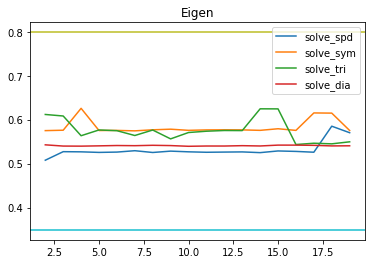

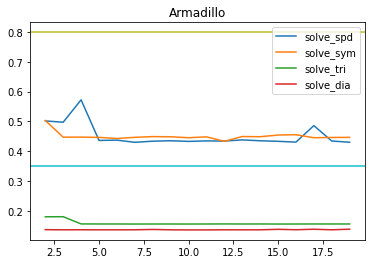

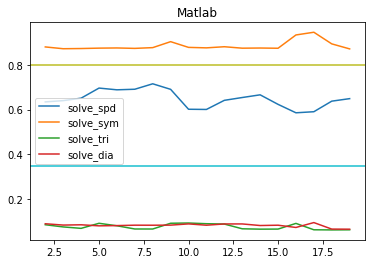

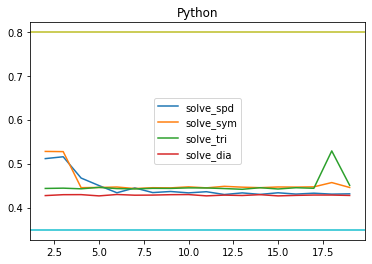

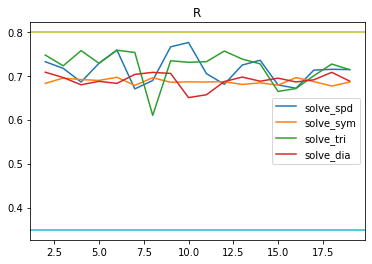

In [4]:
ddf_l = [df_cppe_t, df_cppa_t, df_m_t, df_py_t, df_r_t]
name = ['Eigen', 'Armadillo', 'Matlab', 'Python', 'R']
for i, ddf in enumerate(ddf_l):
    fig, ax = plt.subplots()
    cols_to_use = [i for i in range(2, 20)]
    keywords = ['solve_spd', 'solve_sym', 'solve_tri', 'solve_dia']
    for key in keywords:
        ddf[ddf[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
    ax.axhline(y=df_merged.loc[['solve_rec']].round(3).loc[:, ['C']].iloc[0,0], color='C9')
    ax.axhline(y=df_merged.loc[['solve_sym']].round(3).loc[:, ['C']].iloc[0,0], color='C8')
    ax.legend(keywords)
    ax.set_title(name[i])

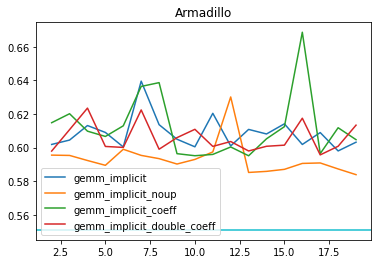

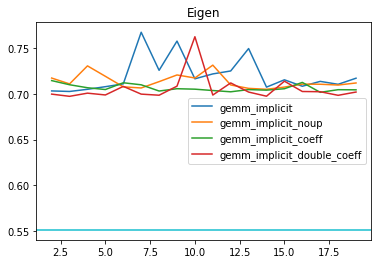

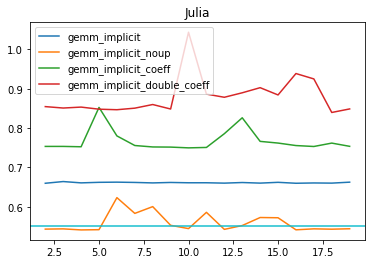

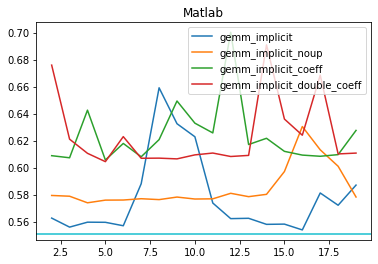

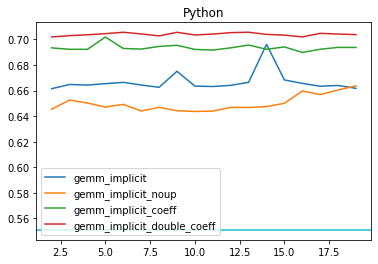

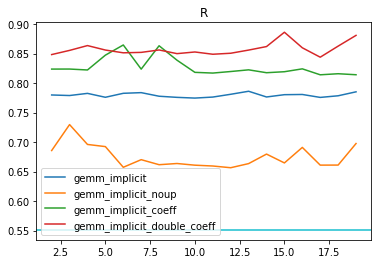

In [5]:
ddf_l = [df_cppa_t, df_cppe_t, df_j_t, df_m_t, df_py_t, df_r_t]
name = ['Armadillo', 'Eigen', 'Julia', 'Matlab', 'Python', 'R']
for i, ddf in enumerate(ddf_l):
    fig, ax = plt.subplots()
    cols_to_use = [i for i in range(2, 20)]
    keywords = ['gemm_implicit', 'gemm_implicit_noup', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
    for key in keywords:
        ddf[ddf[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
#     ax.axhline(y=df_merged[df_merged['algorithm'].isin(['gemm_explicit_noup'])].loc[:, ['C']].iloc[0,0], color='C9')
    ax.axhline(y=df_merged.loc[['gemm_explicit_noup']].round(3).loc[:, ['C']].iloc[0,0], color='C9')
    
    ax.legend(keywords)
    ax.set_title(name[i])